<a href="https://colab.research.google.com/github/davidmorrison-08-30/Polynomial-regression-from-scratch/blob/main/PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PREPARATION**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive

In [2]:
np.random.seed()

In [3]:
def gradient(X: np.ndarray, y: np.ndarray, w: np.ndarray):        
  '''Calculating gradient of loss function
  '''
  difference = np.dot(X, w) - y
  return np.dot(X.T, difference)

In [4]:
class GD_PolynomialRegression:

  def __init__(self, lr, degree):
    self.lr = lr                    # LEARNING RATE
    self.n = degree                 # DEGREE n OF THE POLYNOMIAL y = w0 + w1*x + w2*x^2 + ... + wn*x^n
    self.w = None                   # WEIGHTS OR PARAMETERS

  def feature_engineering(self, X: np.ndarray):
    new_features = np.ones((X.shape[0], self.n - 1))
    for i in range(len(X)):
      exp = 2
      for j in range(self.n-1):
        new_features[i][j] = X[i][0] ** exp
        exp += 1
    X_new = np.concatenate((X, new_features), axis=1)
    return X_new

  def predict(self, X: np.ndarray):
   X_new = self.feature_engineering(X)
   return np.dot(X_new, self.w)

  def fit(self, X, y):
    # FEATURE ENGINEERING
    X_new = self.feature_engineering(X)

    # TRAINING BY GRADIENT DESCENT
    self.w = np.random.randint(low=500, high=1000, size=(X_new.shape[1], 1))
    self.w = self.w.astype(float)
    for iter in range(10000):
      grad = gradient(X_new, y, self.w)
      self.w = self.w - grad*self.lr

In [5]:
def r2_score(y_pred, y):
  RSS = TSS = 0               # RSS = RESIDUAL SUM OF SQUARES, TSS = TOTAL SUM OF SQUARES
  for i in range(len(y)):
    RSS += (y[i]-y_pred[i])**2
  mean_y = np.mean(y)
  for i in range(len(y)):
    TSS += (y[i]-mean_y)**2
  return 1 - (RSS/TSS)[0]

In [6]:
def MSE(pred, actual):
  return np.square(np.subtract(actual, pred)).mean()

In [7]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **DATA PREPROCESSING**

In [8]:
# read data
df = pd.read_csv("gdrive/My Drive/covid_global.csv")

In [9]:
df.head(5)

,date,World
0,1/3/2020,0
1,1/4/2020,3
2,1/5/2020,0
3,1/6/2020,3
4,1/7/2020,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1153 non-null   object
 1   World   1153 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.1+ KB


In [11]:
df.describe()

,World
count,1.153000e+03
mean,6.578006e+05
std,8.014240e+05
min,0.000000e+00
25%,2.857820e+05
50%,4.885260e+05
75%,6.772360e+05
max,7.946896e+06


In [12]:
df.isna().sum()

date     0
World    0
dtype: int64

In [13]:
df.shape

(1153, 2)

## **DATA UNDERSTANDING**

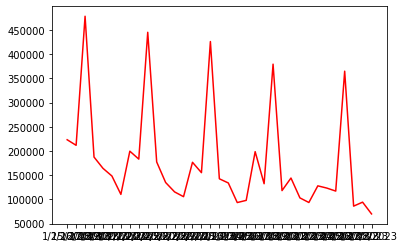

In [14]:
plt.plot(df.iloc[1118: ,0], df.iloc[1118: ,1], color="red")

We will use 35 records to train and test the model: 30 to train and 5 to test

In [15]:
X = np.array([[i] for i in range(35)])
y = df.iloc[1118:, 1].to_numpy().reshape(-1, 1)

## **DATA SCALING**

In [16]:
std_scaler = StandardScaler()
y = std_scaler.fit_transform(y)

In [17]:
X = std_scaler.fit_transform(X)

## **TRAINING & EVALUATION**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5/35, shuffle=False)

In [19]:
model = GD_PolynomialRegression(0.001, 3)

In [20]:
model.fit(X_train, y_train)

In [21]:
print(model.w)

[[-0.08966653]
 [-0.13212573]
 [-0.23104219]]


In [22]:
y_train_pred = model.predict(X_train)
MSE(y_train_pred, y_train)

0.853165136712882

In [23]:
y_test_pred = model.predict(X_test)
MSE(y_test_pred, y_test)

1.6833805561216622

In [24]:
r2_score(y_train_pred, y_train)

0.11842328987716533

In [25]:
r2_score(y_test_pred, y_test)

-0.5535759509954026

**THE R-SQUARED VALUE IS VERY LOW BECAUSE ONLY ONE INDEPENDENT VARIABLE IS AVAILABLE. SO, IT'S RECOMMENDED THAT THIS KIND OF PREDICTION SHOULD ONLY BE USED FOR SHORT-TERM PREDICTION BECAUSE ONLY ONE INDEPENDENT VARIABLE IS KNOWN (THE DATE)**